In [78]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
plt.style.use('ggplot')
%matplotlib inline

DATA_PATH = os.path.join(os.getcwd(),'data','Houses_data.csv')

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

**DESCRIPTION**:

The data file contains information on 76 single-family homes in one of the USA states.

At the time the data were collected, the data submitter was preparing to place his house on the market and it was important to come up with a reasonable asking price. 

In [80]:
df = pd.read_csv(DATA_PATH)

In [81]:
print('shape:', df.shape)
df.head()

shape: (76, 11)


,id,Price,Size,Lot,Bath,Bed,Year,Age,Garage,Status,elem
0,1,388.0,2.180,4,3.0,4,1940,-3.0,0,sld,edison
1,2,450.0,2.054,5,3.0,4,1957,-1.3,2,sld,edison
2,3,386.0,2.112,5,2.0,4,1955,-1.5,2,sld,edison
3,4,350.0,1.442,6,1.0,2,1956,-1.4,1,act,adams
4,5,155.5,1.800,1,2.0,4,1994,2.4,1,sld,adams


**VARIABLE DESCRIPTIONS**:

* **id** = ID number
* **Price** = sale price (thousands of dollars)
* **Size** = floor size (thousands of square feet) 
* **Lot** = lot size category (from 1 to 11, based on the land area that belongs to the house)
* **Bath** = number of bathrooms (with half-bathrooms counting as 0.1)
* **Bed** = number of bedrooms (between 2 and 6)
* **Year** = year built
* **Age** = age (standardized: (Year-1970)/10)
* **Garage** = garage size (0, 1, 2, or 3 cars)
* **Status** = act (active listing), pen (pending sale), or sld (sold)
* **Elem** = nearest elementary school (edgewood, edison, harris, adams, crest, or parker)

### Data Overview

Let's look at general info about our data

In [82]:
print('DATA VARIABLES\n')

print('='*30)
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print('categogical columns:')
print(categorical_columns)
print('='*30)
print('numerical columns:')
print(numerical_columns)

DATA VARIABLES

categogical columns:
['Status', 'elem']
numerical columns:
['id', 'Price', 'Size', 'Lot', 'Bath', 'Bed', 'Year', 'Age', 'Garage']


In [83]:
df.info()

print('\n' + '*'*30)
print('Number of unique IDs: %d' % len(df['id'].unique()))
print('\n' + '*'*30)
print('Unique Status:')
print(df['Status'].unique())
print('\n' + '*'*30)
print('Unique elem:')
print(df['elem'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 11 columns):
id        76 non-null int64
Price     76 non-null float64
Size      76 non-null float64
Lot       76 non-null int64
Bath      76 non-null float64
Bed       76 non-null int64
Year      76 non-null int64
Age       76 non-null float64
Garage    76 non-null int64
Status    76 non-null object
elem      76 non-null object
dtypes: float64(4), int64(5), object(2)
memory usage: 6.6+ KB

******************************
Number of unique IDs: 76

******************************
Unique Status:
['sld' 'act' 'pen']

******************************
Unique elem:
['edison' 'adams' 'parker' 'edge' 'harris' 'crest']


In [84]:
df[['Price', 'Size', 'Lot', 'Bath', 'Bed', 'Age', 'Garage']].describe().round(decimals=2)

,Price,Size,Lot,Bath,Bed,Age,Garage
count,76.00,76.00,76.00,76.00,76.00,76.00,76.00
mean,285.80,26.79,3.99,2.21,3.45,-0.06,1.57
std,60.33,216.34,1.65,0.57,0.74,2.35,0.77
min,155.50,1.44,1.00,1.00,2.00,-6.50,0.00
25%,242.75,1.86,3.00,2.00,3.00,-1.22,1.00
50%,276.00,1.97,4.00,2.00,3.00,-0.05,2.00
75%,336.75,2.11,5.00,3.00,4.00,1.00,2.00
max,450.00,1888.00,11.00,3.10,6.00,3.50,3.00


In [85]:
df[df['Size'] > 1800]

,id,Price,Size,Lot,Bath,Bed,Year,Age,Garage,Status,elem
34,35,252.5,1888.0,2,2.0,6,1920,-5.0,0,sld,edison


In [86]:
df = df[df['Size'] < 1800]

### Data Analysis

Looking at data correlation, trends etc. 
Mostly plots and diagrams

##### Numerical features correlation

In [87]:
df[['Price', 'Size', 'Lot', 'Bath', 'Bed', 'Age', 'Garage']].corr()

,Price,Size,Lot,Bath,Bed,Age,Garage
Price,1.000000,0.199158,0.238091,0.172450,-0.285012,0.143070,0.353950
Size,0.199158,1.000000,0.034871,0.471533,0.280564,0.170901,0.167412
Lot,0.238091,0.034871,1.000000,-0.178827,-0.173881,-0.076540,0.210828
Bath,0.172450,0.471533,-0.178827,1.000000,0.179161,0.334610,0.197515
Bed,-0.285012,0.280564,-0.173881,0.179161,1.000000,-0.298288,-0.347231
Age,0.143070,0.170901,-0.076540,0.334610,-0.298288,1.000000,0.508892
Garage,0.353950,0.167412,0.210828,0.197515,-0.347231,0.508892,1.000000


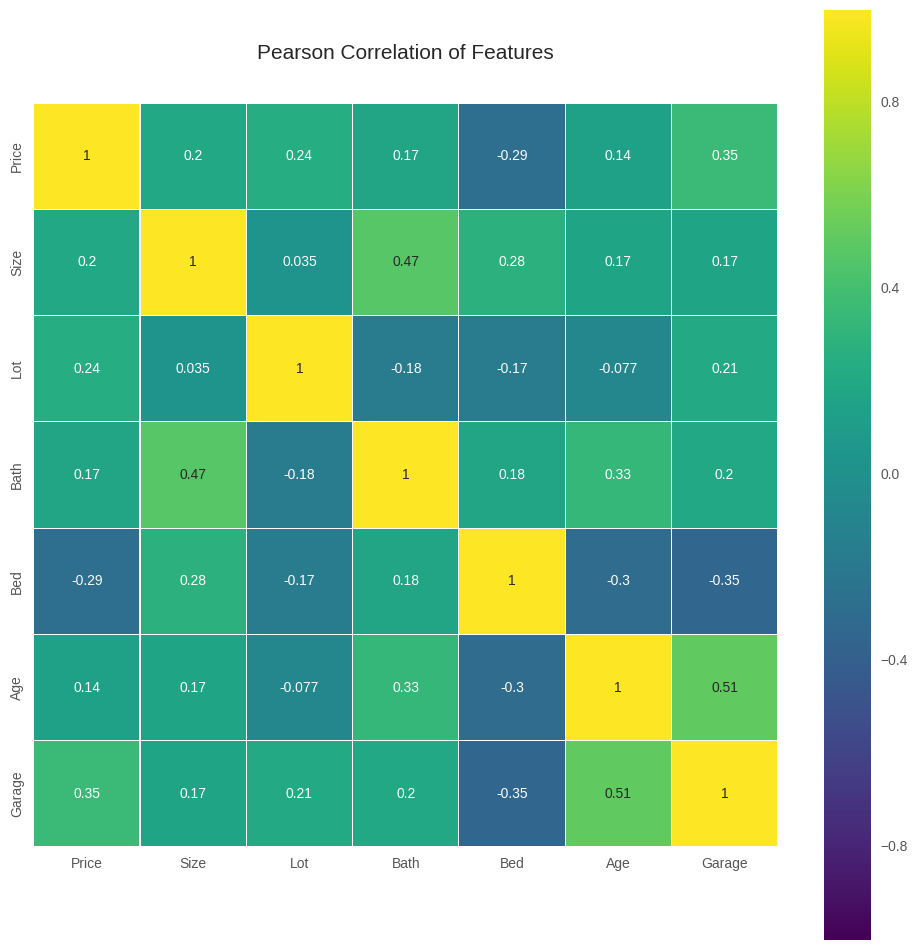

In [88]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df[['Price', 'Size', 'Lot', 'Bath', 'Bed', 'Age', 'Garage']].astype(float).corr(),
            linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

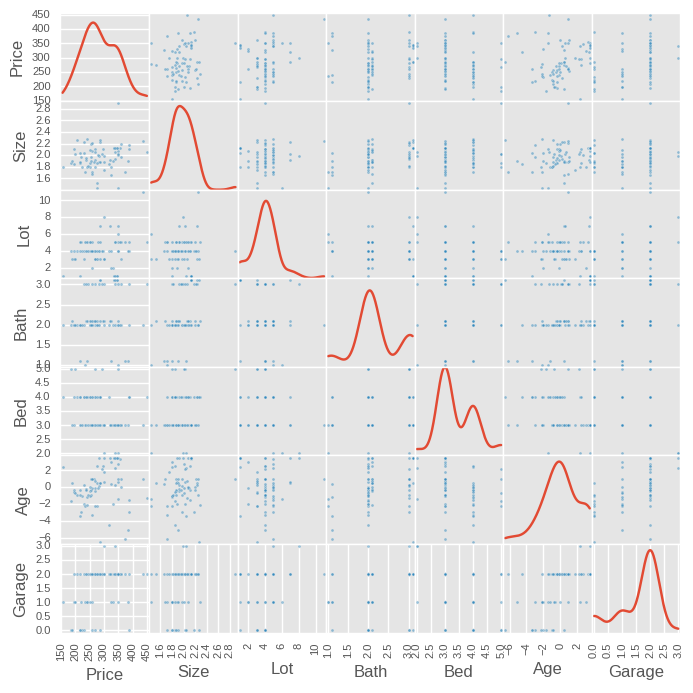

In [89]:
scatter_matrix(df[['Price', 'Size', 'Lot', 'Bath', 'Bed', 'Age', 'Garage']], 
               alpha=0.5, figsize=(8, 8), diagonal='kde');

#### Some plots and diagrams

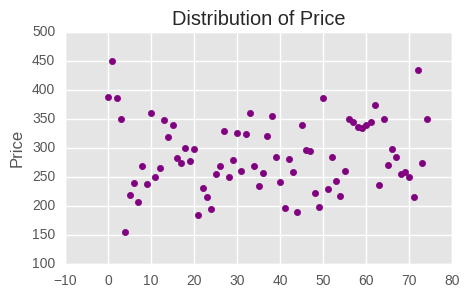

In [90]:
plt.figure(figsize=(5, 3))
plt.scatter(range(df.shape[0]), df["Price"].values,color='purple')
plt.ylabel("Price")
plt.title("Distribution of Price");

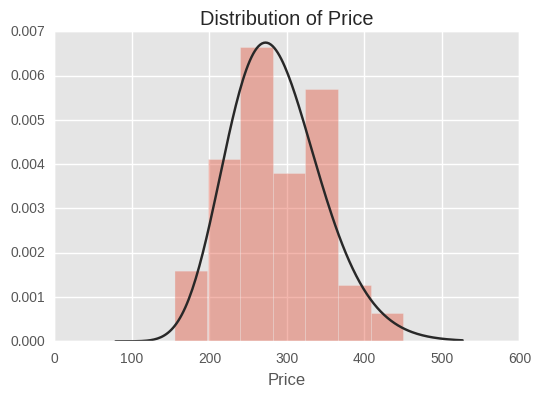

In [91]:
sns.distplot(df["Price"].values, kde=False, fit=gamma);
plt.xlabel("Price")
plt.title("Distribution of Price");

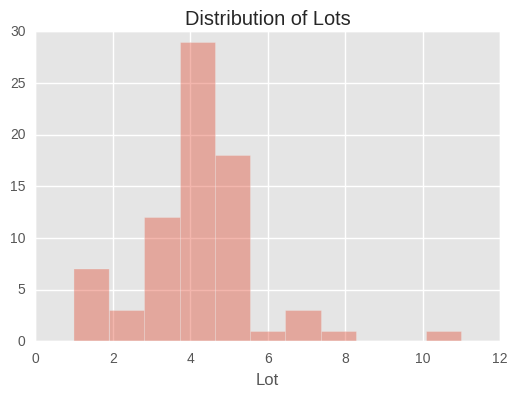

In [92]:
sns.distplot(df["Lot"].values, kde=False);
plt.xlabel("Lot")
plt.title("Distribution of Lots");

#### Pie charts

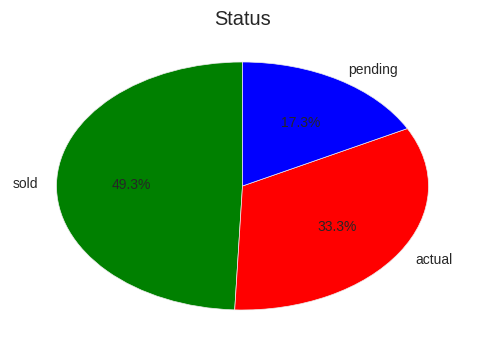

In [93]:
labels = ['sold','actual','pending']
sizes = df['Status'].value_counts().values
explode=[0,0,0]
colors = ['green','red','blue']
patches, texts,autotexts= plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%",
                        startangle=90)
plt.title("Status")
plt.show()

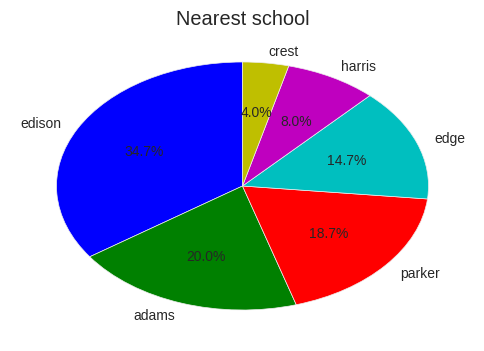

In [94]:
labels = ['edison','adams','parker','edge','harris','crest']
sizes = df['elem'].value_counts().values
explode=[0,0,0,0,0,0]
#colors = ['green','red','blue']
patches, texts,autotexts= plt.pie(sizes, labels=labels,explode=explode,autopct="%1.1f%%",
                        startangle=90)
plt.title("Nearest school")
plt.show()

#### Price dependencies

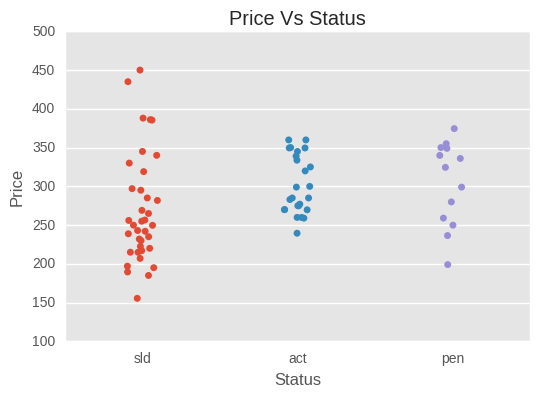

In [95]:
sns.stripplot(x="Status", y="Price", data=df, jitter=True)
plt.title("Price Vs Status");

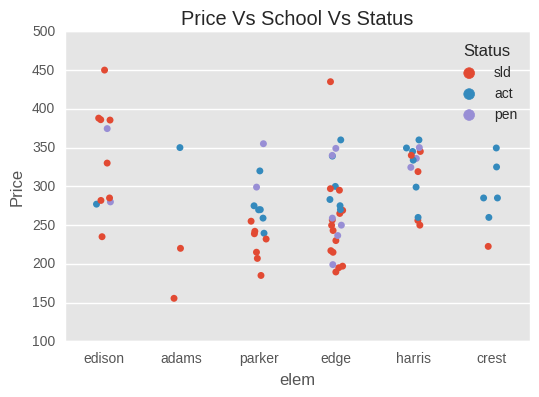

In [96]:
sns.stripplot(x="elem", y="Price", hue="Status", data=df, jitter=True)
plt.title("Price Vs School Vs Status");

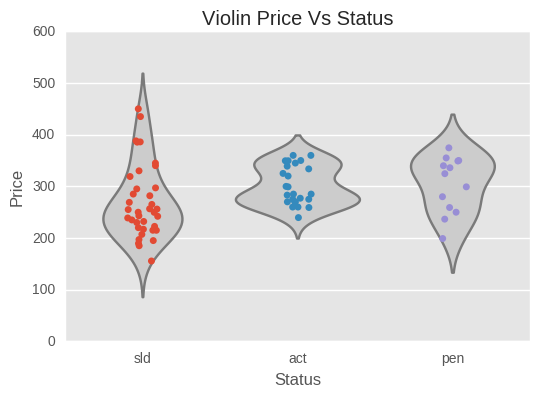

In [97]:
ax = sns.violinplot(x="Status", y="Price", data=df, inner=None, color=".8")
ax = sns.stripplot(x="Status", y="Price", data=df, jitter=True)
plt.title("Violin Price Vs Status");

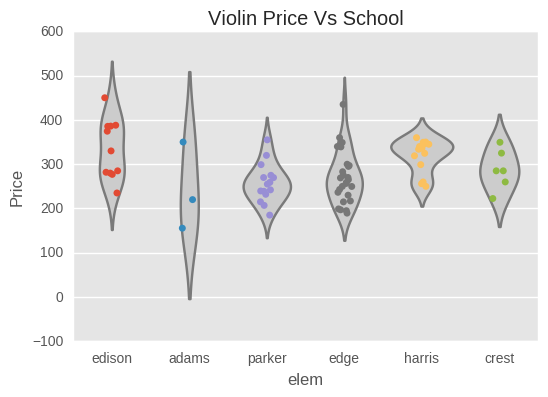

In [98]:
ax = sns.violinplot(x="elem", y="Price", data=df, inner=None, color=".8")
ax = sns.stripplot(x="elem", y="Price", data=df, jitter=True)
plt.title("Violin Price Vs School");

### Data Preparation

In [99]:
df.drop(labels=['id', 'Year', 'Status'], axis=1, inplace=True)
df = pd.get_dummies(df)

print('shape:', df.shape)
df.head()

shape: (75, 13)


,Price,Size,Lot,Bath,Bed,Age,Garage,elem_adams,elem_crest,elem_edge,elem_edison,elem_harris,elem_parker
0,388.0,2.180,4,3.0,4,-3.0,0,0.0,0.0,0.0,1.0,0.0,0.0
1,450.0,2.054,5,3.0,4,-1.3,2,0.0,0.0,0.0,1.0,0.0,0.0
2,386.0,2.112,5,2.0,4,-1.5,2,0.0,0.0,0.0,1.0,0.0,0.0
3,350.0,1.442,6,1.0,2,-1.4,1,1.0,0.0,0.0,0.0,0.0,0.0
4,155.5,1.800,1,2.0,4,2.4,1,1.0,0.0,0.0,0.0,0.0,0.0


#### Let's try different models and check which one is better
* Lasso linear model
* Linear least squares with l2 regularization
* Gradient Boosting
* Linear regression with combined L1 and L2 priors as regularizer
* Ordinary least squares Linear Regression

As dataset is small, we will perform 100 training attempts, each time shuffling data and spliting it on train and cross validation datasets in ratio 4:1.

After that we will check results of training process and will choose the best model (or ensemble some of them)

In [100]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV


models = [
          LinearRegression(),
          LassoCV(alphas=[0.005, 0.1, 0.3, 1, 3, 5, 10]),
          xgb.XGBRegressor(),
          ElasticNetCV(alphas=[0.005, 0.1, 0.3, 1, 3, 5, 10], l1_ratio=[.01, .1, .5, .9, .99]),
          RidgeCV(alphas=[0.005, 0.1, 0.3, 1, 3, 5, 10])
        ]

models_stat = pd.DataFrame()
for i in range(1, 100):
    #print('FOLD ', i)
    df = shuffle(df)
    X = df.drop(labels=['Price'], axis=1)
    Y = df['Price']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1024)
    tmp = []
    for model in models:
        model.fit(X_train, y_train)
        name = model.__class__.__name__
        #print("="*30)
        #print(name)
        #print('****Results****')
        train_predictions = model.predict(X_test)
        #print('Accuracy', round((1 - (abs(train_predictions - y_test)/y_test)).mean(),4))
        #print("R^2 =", round(r2_score(y_test, train_predictions),4))
        tmp = pd.DataFrame([{'name': model.__class__.__name__, 
                             'Accuracy': round((1 - (abs(train_predictions - y_test)/y_test)).mean(),4),
                             'R^2': round(r2_score(y_test, train_predictions),4),
                             'Fold_num': i
                            }
                           ])
        models_stat = models_stat.append(tmp)      
    #print()
    #print()

#### Table with training algorithms results

In [101]:
models_stat.head()

,Accuracy,Fold_num,R^2,name
0,0.8263,1,0.1985,LinearRegression
0,0.8277,1,0.2116,LassoCV
0,0.8339,1,0.1134,XGBRegressor
0,0.8316,1,0.2297,ElasticNetCV
0,0.8352,1,0.2541,RidgeCV


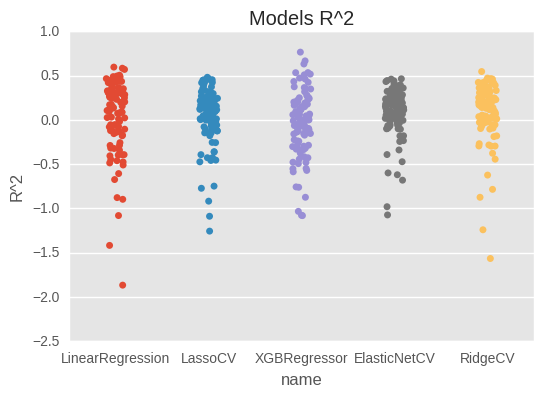

In [102]:
sns.stripplot(x="name", y="R^2", data=models_stat, jitter=True)
plt.title("Models R^2");

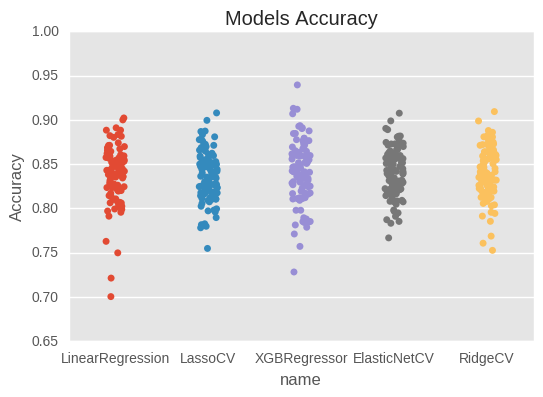

In [103]:
sns.stripplot(x="name", y="Accuracy", data=models_stat, jitter=True)
plt.title("Models Accuracy");

#### My choise has fallen on xgboost